In [1]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Load data:
clark_county_ts2021 = pd.read_csv("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/Clark_County_TS2021.csv")
bridges_excel = pd.ExcelFile("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/bridges.xlsx")

# Load necessary sheets from the Excel file
stcc = bridges_excel.parse("STCC")
modes = bridges_excel.parse("Modes")
regions = bridges_excel.parse("Regions")

# Define origin_regions and destination_regions separately
origin_regions = regions.rename(columns={"Region": "Origin Region", "Region Name": "Origin Region Name"})
destination_regions = regions.rename(columns={"Region": "Destination Region", "Region Name": "Destination Region Name"})


# Ensure 'STCC4' column in both dataframes is of type string
# For example, replace NaN with a known string
stcc['STCC4'] = stcc['STCC4'].astype(str)
# naics_stcc['STCC4'] = naics_stcc['STCC4'].astype(str)
# naics_stcc['NAICS_code'] = naics_stcc['NAICS_code'].astype(str)
# Create a new DataFrame from 'stcc' that only includes rows with 2-digit 'STCC' codes
stcc_2digit = stcc[stcc['STCC'].str.len() == 2].copy()
# Ensure 'STCC4' is of type string
stcc_2digit['STCC4'] = stcc_2digit['STCC4'].astype(str)
# Merge stcc_2digit and naics_stcc using STCC4
#stcc_2digit = pd.merge(stcc_2digit, naics_stcc, how='left', on='STCC4')
#stcc = pd.merge(stcc, naics_stcc, how='left', on='STCC4')

# Merge stcc (which now includes naics_stcc data) into clark_county_ts2021 using STCC
clark_county_ts2021 = pd.merge(clark_county_ts2021, stcc, how='left', on='STCC')

# Merge modes into clark_county_ts2021 using Mode
clark_county_ts2021 = pd.merge(clark_county_ts2021, modes, how='left', on='Mode')
# Merge origin_regions and destination_regions into clark_county_ts2021
clark_county_ts2021 = pd.merge(clark_county_ts2021, origin_regions, on='Origin Region', how='left')
clark_county_ts2021 = pd.merge(clark_county_ts2021, destination_regions, on='Destination Region', how='left')

# Create 'STCC_2digit' column in 'clark_county_ts2021' DataFrame
clark_county_ts2021['STCC_2digit'] = clark_county_ts2021['STCC'].str[:2]

# Print DataFrame to check
#print(clark_county_ts2021)


In [2]:
print(clark_county_ts2021)

         Year  Origin Region  Destination Region   STCC Trade Type  Mode  \
0        2015              1                 165  01 14          D     4   
1        2015              1                 165  01 19          D     4   
2        2015              1                 165  14 51          D     4   
3        2015              1                 166  35 35          D     5   
4        2015              1               32003  01 19          D     4   
...       ...            ...                 ...    ...        ...   ...   
1058238  2050          32003               32003   50 1          D     5   
1058239  2050          32003               32003   50 1          D     6   
1058240  2050          32003               32003  50 22          D     4   
1058241  2050          32003               32003  50 31          D     4   
1058242  2050          32003               32003  50 32          D     4   

                  Tons         Units         Value  Average Miles  ...  \
0            

In [3]:
# Rename the rest of the columns
clark_county_ts2021.rename(columns={
    'State_x': 'Origin State', 
    'BEA_x': 'Origin BEA', 
    'BEA Name_x': 'Origin BEA Name', 
    'Country_x': 'Origin Country', 
    'State_y': 'Destination State', 
    'BEA_y': 'Destination BEA', 
    'BEA Name_y': 'Destination BEA Name', 
    'Country_y': 'Destination Country'}, inplace=True)


In [4]:
clark_county_ts2021

,Year,Origin Region,Destination Region,STCC,Trade Type,Mode,Tons,Units,Value,Average Miles,...,Origin State,Origin BEA,Origin BEA Name,Origin Country,Destination Region Name,Destination State,Destination BEA,Destination BEA Name,Destination Country,STCC_2digit
0,2015,1,165,01 14,D,4,0.060575,0.003927,1.678699e+01,2348.3999,...,AL,36,"Dothan, AL",US,Nevada Portion of Reno BEA,NV,151,"Reno, NV",US,01
1,2015,1,165,01 19,D,4,0.447512,0.021637,6.846934e+01,2348.3999,...,AL,36,"Dothan, AL",US,Nevada Portion of Reno BEA,NV,151,"Reno, NV",US,01
2,2015,1,165,14 51,D,4,0.295351,0.012149,1.261019e+01,2339.9998,...,AL,36,"Dothan, AL",US,Nevada Portion of Reno BEA,NV,151,"Reno, NV",US,14
3,2015,1,166,35 35,D,5,3.790659,0.285492,3.219333e+04,2192.8999,...,AL,36,"Dothan, AL",US,Remainder of Nevada Portion of Las Vegas BEA,NV,153,"Las Vegas, NV",US,35
4,2015,1,32003,01 19,D,4,0.735466,0.035559,1.125264e+02,1970.6001,...,AL,36,"Dothan, AL",US,"Clark County, NV",NV,153,"Las Vegas, NV",US,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058238,2050,32003,32003,50 1,D,5,36925.441000,1796.137100,5.283480e+07,16.0000,...,NV,153,"Las Vegas, NV",US,"Clark County, NV",NV,153,"Las Vegas, NV",US,50
1058239,2050,32003,32003,50 1,D,6,841962.750000,40954.977000,1.204723e+09,16.0000,...,NV,153,"Las Vegas, NV",US,"Clark County, NV",NV,153,"Las Vegas, NV",US,50
1058240,2050,32003,32003,50 22,D,4,196761.920000,13588.907000,1.063695e+09,16.0000,...,NV,153,"Las Vegas, NV",US,"Clark County, NV",NV,153,"Las Vegas, NV",US,50
1058241,2050,32003,32003,50 31,D,4,62400.527000,3167.539600,8.104652e+08,16.0000,...,NV,153,"Las Vegas, NV",US,"Clark County, NV",NV,153,"Las Vegas, NV",US,50


In [5]:
print(clark_county_ts2021.columns)


Index(['Year', 'Origin Region', 'Destination Region', 'STCC', 'Trade Type',
       'Mode', 'Tons', 'Units', 'Value', 'Average Miles', 'First Node',
       'Last Node', 'From FIPS', 'To FIPS', 'Entry Road', 'Exit Road',
       'Commodity', 'STCC4', 'Code', 'Name', 'Group', 'Origin Region Name',
       'Origin State', 'Origin BEA', 'Origin BEA Name', 'Origin Country',
       'Destination Region Name', 'Destination State', 'Destination BEA',
       'Destination BEA Name', 'Destination Country', 'STCC_2digit'],
      dtype='object')


In [4]:
selected_columns = [
    'Year', 'Origin Region', 'Origin Region Name',  'Origin BEA Name', 'Origin State', 'Origin Country', 
    'Destination Region', 'Destination Region Name', 'Destination BEA Name', 
    'Destination State', 'Destination Country', 'STCC_2digit', 'STCC', 'Commodity', 'Value', 'Tons'
]

clark_county_ts2021_filtered = clark_county_ts2021[selected_columns]


In [7]:
clark_county_ts2021_filtered

,Year,Origin Region,Origin Region Name,Origin BEA Name,Origin State,Origin Country,Destination Region,Destination Region Name,Destination BEA Name,Destination State,Destination Country,STCC_2digit,STCC,Commodity,Value,Tons
0,2015,1,Alabama Portion of Dothan BEA,"Dothan, AL",AL,US,165,Nevada Portion of Reno BEA,"Reno, NV",NV,US,01,01 14,"Oil Kernels, Nuts or Seeds",1.678699e+01,0.060575
1,2015,1,Alabama Portion of Dothan BEA,"Dothan, AL",AL,US,165,Nevada Portion of Reno BEA,"Reno, NV",NV,US,01,01 19,Misc. Field Crops,6.846934e+01,0.447512
2,2015,1,Alabama Portion of Dothan BEA,"Dothan, AL",AL,US,165,Nevada Portion of Reno BEA,"Reno, NV",NV,US,14,14 51,Clay Ceramic or Refrac Minerals,1.261019e+01,0.295351
3,2015,1,Alabama Portion of Dothan BEA,"Dothan, AL",AL,US,166,Remainder of Nevada Portion of Las Vegas BEA,"Las Vegas, NV",NV,US,35,35 35,Conveyors or Parts,3.219333e+04,3.790659
4,2015,1,Alabama Portion of Dothan BEA,"Dothan, AL",AL,US,32003,"Clark County, NV","Las Vegas, NV",NV,US,01,01 19,Misc. Field Crops,1.125264e+02,0.735466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058238,2050,32003,"Clark County, NV","Las Vegas, NV",NV,US,32003,"Clark County, NV","Las Vegas, NV",NV,US,50,50 1,Warehouse & Distribution Center,5.283480e+07,36925.441000
1058239,2050,32003,"Clark County, NV","Las Vegas, NV",NV,US,32003,"Clark County, NV","Las Vegas, NV",NV,US,50,50 1,Warehouse & Distribution Center,1.204723e+09,841962.750000
1058240,2050,32003,"Clark County, NV","Las Vegas, NV",NV,US,32003,"Clark County, NV","Las Vegas, NV",NV,US,50,50 22,Rail Intermodal Drayage from Ramp,1.063695e+09,196761.920000
1058241,2050,32003,"Clark County, NV","Las Vegas, NV",NV,US,32003,"Clark County, NV","Las Vegas, NV",NV,US,50,50 31,Air Freight Drayage to Airport,8.104652e+08,62400.527000


In [5]:
region_code = 32003 # Replace with the specific code
outbound = clark_county_ts2021[(clark_county_ts2021['Origin Region'] == region_code) & (clark_county_ts2021['Destination Region'] != region_code)]
inbound = clark_county_ts2021[(clark_county_ts2021['Origin Region'] != region_code) & (clark_county_ts2021['Destination Region'] == region_code)]
through = clark_county_ts2021[(clark_county_ts2021['Origin Region'] != region_code) & (clark_county_ts2021['Destination Region'] != region_code)]
intra = clark_county_ts2021[(clark_county_ts2021['Origin Region'] == region_code) & (clark_county_ts2021['Destination Region'] == region_code)]


In [6]:
through

,Year,Origin Region,Destination Region,STCC,Trade Type,Mode,Tons,Units,Value,Average Miles,...,Origin State,Origin BEA,Origin BEA Name,Origin Country,Destination Region Name,Destination State,Destination BEA,Destination BEA Name,Destination Country,STCC_2digit
0,2015,1,165,01 14,D,4,0.060575,0.003927,16.786987,2348.3999,...,AL,36,"Dothan, AL",US,Nevada Portion of Reno BEA,NV,151,"Reno, NV",US,01
1,2015,1,165,01 19,D,4,0.447512,0.021637,68.469345,2348.3999,...,AL,36,"Dothan, AL",US,Nevada Portion of Reno BEA,NV,151,"Reno, NV",US,01
2,2015,1,165,14 51,D,4,0.295351,0.012149,12.610190,2339.9998,...,AL,36,"Dothan, AL",US,Nevada Portion of Reno BEA,NV,151,"Reno, NV",US,14
3,2015,1,166,35 35,D,5,3.790659,0.285492,32193.330000,2192.8999,...,AL,36,"Dothan, AL",US,Remainder of Nevada Portion of Las Vegas BEA,NV,153,"Las Vegas, NV",US,35
155,2015,2,165,26 31,D,4,184.876500,7.566258,168180.250000,2368.5000,...,AL,39,"Columbus, GA",US,Nevada Portion of Reno BEA,NV,151,"Reno, NV",US,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035705,2050,387,126,36 51,N,7,17.240076,1.008487,167696.890000,2181.2000,...,TM,0,Tamaulipas,MX,Michigan Portion of Elkhart BEA,MI,65,"Elkhart, IN",US,36
1035800,2050,390,66,20 26,N,7,5.566855,0.245365,2532.396700,2099.7000,...,YU,0,Yucatan,MX,Illinois Portion of Chicago BEA,IL,64,"Chicago, IL",US,20
1035801,2050,390,66,20 86,N,7,49.808449,2.185789,27719.701000,2099.7000,...,YU,0,Yucatan,MX,Illinois Portion of Chicago BEA,IL,64,"Chicago, IL",US,20
1035802,2050,390,74,20 71,N,7,1.945357,0.083887,8131.202600,2029.8000,...,YU,0,Yucatan,MX,"Peoria, IL BEA",IL,101,"Peoria, IL",US,20


In [7]:
total_value = through['Value'].sum()
print(f"The total sum of the 'Value' column in the 'through' DataFrame is {total_value}")


The total sum of the 'Value' column in the 'through' DataFrame is 552841471775.4446


In [8]:
total_value_by_year = through.groupby('Year')['Value'].sum()
print("The total sum of the 'Value' column in the 'through' DataFrame by year is:")
print(total_value_by_year)


The total sum of the 'Value' column in the 'through' DataFrame by year is:
Year
2015    1.217089e+11
2019    1.139177e+11
2021    1.144140e+11
2050    2.028009e+11
Name: Value, dtype: float64


In [11]:
print(clark_county_ts2021.columns)
print(intra.columns)


Index(['Year', 'Origin Region', 'Destination Region', 'STCC', 'Trade Type',
       'Mode', 'Tons', 'Units', 'Value', 'Average Miles', 'First Node',
       'Last Node', 'From FIPS', 'To FIPS', 'Entry Road', 'Exit Road',
       'Commodity', 'STCC4', 'Code', 'Name', 'Group', 'Origin Region Name',
       'Origin State', 'Origin BEA', 'Origin BEA Name', 'Origin Country',
       'Destination Region Name', 'Destination State', 'Destination BEA',
       'Destination BEA Name', 'Destination Country', 'STCC_2digit'],
      dtype='object')
Index(['Year', 'Origin Region', 'Destination Region', 'STCC', 'Trade Type',
       'Mode', 'Tons', 'Units', 'Value', 'Average Miles', 'First Node',
       'Last Node', 'From FIPS', 'To FIPS', 'Entry Road', 'Exit Road',
       'Commodity', 'STCC4', 'Code', 'Name', 'Group', 'Origin Region Name',
       'Origin State', 'Origin BEA', 'Origin BEA Name', 'Origin Country',
       'Destination Region Name', 'Destination State', 'Destination BEA',
       'Destination BE

## BEFORE ^^^ The data is grouped, we can see the different break outs. We can group the data, and then keep commodities later on for a summary that way.

### Summary for regions, states, BEA Name, Country. GEOGRAPHICAL SUMMARY

In [12]:
columns_to_group_by = ['Year', 'Origin Region','Origin Region Name', 'Origin BEA Name', 'Origin State', 'Origin Country','Destination Region', 'Destination Region Name', 'Destination State', 'Destination BEA Name', 'Destination Country']

outbound_summary = outbound.groupby(columns_to_group_by)[['Value', 'Tons']].sum().reset_index()
inbound_summary = inbound.groupby(columns_to_group_by)[['Value', 'Tons']].sum().reset_index()
through_summary = through.groupby(columns_to_group_by)[['Value', 'Tons']].sum().reset_index()
intra_summary = intra.groupby(columns_to_group_by)[['Value', 'Tons']].sum().reset_index()


In [13]:
# Rename the columns
outbound_summary.rename(columns={'Value': 'OB_Value', 'Tons': 'OB_Tons'}, inplace=True)
inbound_summary.rename(columns={'Value': 'IB_Value', 'Tons': 'IB_Tons'}, inplace=True)
through_summary.rename(columns={'Value': 'Thr_Value', 'Tons': 'Thr_Tons'}, inplace=True)
intra_summary.rename(columns={'Value': 'Intr_Value', 'Tons': 'Intr_Tons'}, inplace=True)

# Merge all the DataFrames on Year and selected columns as before
summary_final = pd.merge(outbound_summary, inbound_summary, on=columns_to_group_by, how='outer')
summary_final = pd.merge(summary_final, through_summary, on=columns_to_group_by, how='outer')
summary_final = pd.merge(summary_final, intra_summary, on=columns_to_group_by, how='outer')

# Replace NaN with 0 for specific columns
columns_to_replace_nan = ['OB_Value', 'OB_Tons', 'IB_Value', 'IB_Tons', 'Thr_Value', 'Thr_Tons', 'Intr_Value', 'Intr_Tons']
summary_final[columns_to_replace_nan] = summary_final[columns_to_replace_nan].fillna(0)

# Calculate the Total Value and Total Tons for each row
summary_final['Total_Value'] = summary_final['OB_Value'] + summary_final['IB_Value'] + summary_final['Thr_Value'] + summary_final['Intr_Value']
summary_final['Total_Tons'] = summary_final['OB_Tons'] + summary_final['IB_Tons'] + summary_final['Thr_Tons'] + summary_final['Intr_Tons']

# Print the final DataFrame with Total Value and Total Tons columns
print(summary_final)


       Year  Origin Region Origin Region Name Origin BEA Name Origin State  \
0      2015          32003   Clark County, NV   Las Vegas, NV           NV   
1      2015          32003   Clark County, NV   Las Vegas, NV           NV   
2      2015          32003   Clark County, NV   Las Vegas, NV           NV   
3      2015          32003   Clark County, NV   Las Vegas, NV           NV   
4      2015          32003   Clark County, NV   Las Vegas, NV           NV   
...     ...            ...                ...             ...          ...   
13884  2050            390            Yucatan         Yucatan           YU   
13885  2015          32003   Clark County, NV   Las Vegas, NV           NV   
13886  2019          32003   Clark County, NV   Las Vegas, NV           NV   
13887  2021          32003   Clark County, NV   Las Vegas, NV           NV   
13888  2050          32003   Clark County, NV   Las Vegas, NV           NV   

      Origin Country  Destination Region            Destination

In [15]:
print(summary_final.columns)

Index(['Year', 'Origin Region', 'Origin Region Name', 'Origin BEA Name',
       'Origin State', 'Origin Country', 'Destination Region',
       'Destination Region Name', 'Destination State', 'Destination BEA Name',
       'Destination Country', 'OB_Value', 'OB_Tons', 'IB_Value', 'IB_Tons',
       'Thr_Value', 'Thr_Tons', 'Intr_Value', 'Intr_Tons', 'Total_Value',
       'Total_Tons'],
      dtype='object')


In [16]:
# Start with the original DataFrame
clark_county_ts2021 = summary_final

# Group by Year, Origin State, Origin Country, Destination State, and Destination Country
summary_regionLevel = clark_county_ts2021.groupby(
    ['Year','Origin Region', 'Origin State', 'Origin Country', 'Destination Region','Destination State', 'Destination Country']
)[['Total_Value', 'Total_Tons']].sum().reset_index()

# Replace NaN with 0 if necessary
summary_regionLevel = summary_regionLevel.fillna(0)

# Print the summarized DataFrame
print(summary_regionLevel)


       Year  Origin Region Origin State Origin Country  Destination Region  \
0      2015              1           AL             US                 165   
1      2015              1           AL             US                 166   
2      2015              1           AL             US               32003   
3      2015              2           AL             US                 165   
4      2015              2           AL             US               32003   
...     ...            ...          ...            ...                 ...   
13884  2050          32003           NV             US                 384   
13885  2050          32003           NV             US                 385   
13886  2050          32003           NV             US                 387   
13887  2050          32003           NV             US                 391   
13888  2050          32003           NV             US               32003   

      Destination State Destination Country   Total_Value    To

In [17]:
# Start with the original DataFrame
clark_county_ts2021 = summary_final

# Group by Year, Origin State, Origin Country, Destination State, and Destination Country
summary_by_year_state_country = clark_county_ts2021.groupby(
    ['Year','Origin State', 'Origin Country', 'Destination State', 'Destination Country']
)[['Total_Value', 'Total_Tons']].sum().reset_index()

# Replace NaN with 0 if necessary
summary_by_year_state_country = summary_by_year_state_country.fillna(0)

# Print the summarized DataFrame
print(summary_by_year_state_country)

      Year Origin State Origin Country Destination State Destination Country  \
0     2015           AB             CA                AZ                  US   
1     2015           AB             CA                CA                  US   
2     2015           AB             CA                NV                  US   
3     2015           AG             MX                ID                  US   
4     2015           AG             MX                NV                  US   
...    ...          ...            ...               ...                 ...   
2407  2050           WY             US                CI                  MX   
2408  2050           WY             US                NV                  US   
2409  2050           YU             MX                IL                  US   
2410  2050           YU             MX                NV                  US   
2411  2050           ZT             MX                NV                  US   

       Total_Value     Total_Tons  
0  

In [81]:
print(summary_by_year_state_country['Origin Country'].unique())
print(summary_by_year_state_country['Destination Country'].unique())
print(us_filtered_summary['Destination Country'].unique())
print(us_filtered_summary['Origin Country'].unique())

['CA' 'MX' 'US']
['US' 'MX' 'CA']
['MX' 'US' 'CA']
['US']


In [18]:
summary_by_year_state_country['Origin State_Country'] = summary_by_year_state_country['Origin State'] + ', ' + summary_by_year_state_country['Origin Country']
summary_by_year_state_country['Destination State_Country'] = summary_by_year_state_country['Destination State'] + ', ' + summary_by_year_state_country['Destination Country']


In [19]:
summary_by_year_state_country

,Year,Origin State,Origin Country,Destination State,Destination Country,Total_Value,Total_Tons,Origin State_Country,Destination State_Country
0,2015,AB,CA,AZ,US,5.119763e+06,3808.207138,"AB, CA","AZ, US"
1,2015,AB,CA,CA,US,5.251552e+08,525924.230889,"AB, CA","CA, US"
2,2015,AB,CA,NV,US,1.065181e+08,157962.241245,"AB, CA","NV, US"
3,2015,AG,MX,ID,US,3.508684e+04,9.018925,"AG, MX","ID, US"
4,2015,AG,MX,NV,US,1.152363e+06,133.478185,"AG, MX","NV, US"
...,...,...,...,...,...,...,...,...,...
2407,2050,WY,US,CI,MX,2.683579e+05,32.785985,"WY, US","CI, MX"
2408,2050,WY,US,NV,US,8.141409e+07,115097.118511,"WY, US","NV, US"
2409,2050,YU,MX,IL,US,4.955055e+04,67.348002,"YU, MX","IL, US"
2410,2050,YU,MX,NV,US,5.699608e+04,6.208941,"YU, MX","NV, US"


In [20]:
us_origin_data = summary_by_year_state_country[summary_by_year_state_country['Origin Country'] == 'US']
us_destination_data = summary_by_year_state_country[summary_by_year_state_country['Destination Country'] == 'US']


In [105]:
us_origin_data

,Year,Origin State,Origin Country,Destination State,Destination Country,Total_Value,Total_Tons,Origin State_Country,Destination State_Country
5,2015,AK,US,BJ,MX,3.932605e+05,1.240244e+02,"AK, US","BJ, MX"
6,2015,AK,US,DF,MX,1.009187e+04,7.807131e+00,"AK, US","DF, MX"
7,2015,AK,US,JA,MX,2.116777e+04,1.957544e+01,"AK, US","JA, MX"
8,2015,AK,US,NV,US,5.888916e+07,5.253534e+03,"AK, US","NV, US"
9,2015,AL,US,CA,US,9.429141e+04,1.703347e+02,"AL, US","CA, US"
...,...,...,...,...,...,...,...,...,...
2404,2050,WY,US,BJ,MX,6.228934e+06,2.382936e+03,"WY, US","BJ, MX"
2405,2050,WY,US,BS,MX,9.513401e+05,3.734538e+01,"WY, US","BS, MX"
2406,2050,WY,US,CA,US,9.980573e+08,1.465119e+06,"WY, US","CA, US"
2407,2050,WY,US,CI,MX,2.683579e+05,3.278599e+01,"WY, US","CI, MX"


In [106]:
us_destination_data

,Year,Origin State,Origin Country,Destination State,Destination Country,Total_Value,Total_Tons,Origin State_Country,Destination State_Country
0,2015,AB,CA,AZ,US,5.119763e+06,3.808207e+03,"AB, CA","AZ, US"
1,2015,AB,CA,CA,US,5.251552e+08,5.259242e+05,"AB, CA","CA, US"
2,2015,AB,CA,NV,US,1.065181e+08,1.579622e+05,"AB, CA","NV, US"
3,2015,AG,MX,ID,US,3.508684e+04,9.018925e+00,"AG, MX","ID, US"
4,2015,AG,MX,NV,US,1.152363e+06,1.334782e+02,"AG, MX","NV, US"
...,...,...,...,...,...,...,...,...,...
2406,2050,WY,US,CA,US,9.980573e+08,1.465119e+06,"WY, US","CA, US"
2408,2050,WY,US,NV,US,8.141409e+07,1.150971e+05,"WY, US","NV, US"
2409,2050,YU,MX,IL,US,4.955055e+04,6.734800e+01,"YU, MX","IL, US"
2410,2050,YU,MX,NV,US,5.699608e+04,6.208941e+00,"YU, MX","NV, US"


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

def create_circular_bar_chart(df, year, variable):
    # Filter the DataFrame by the specified year and U.S. as the Origin Country
    df_year = df[(df['Year'] == year) & (df['Origin Country'] == 'US') & (df[variable] > 0)]

    if df_year.empty:
        print(f"No positive values for '{variable}' in year {year}. Skipping plot.")
        return

    # Group by 'Origin State_Country' and sum the variable
    df_year_grouped = df_year.groupby('Origin State_Country')[variable].sum().reset_index()

    # Define the categories and colors
    categories = df_year_grouped['Origin State_Country'].unique()
    color_dict = dict(zip(categories, sns.color_palette("hls", len(categories))))

    fig, ax = plt.subplots(figsize=(9,9), subplot_kw=dict(polar=True))

    lowerLimit = 10
    upperLimit = 100

    max_val = df_year_grouped[variable].max()
    slope = (np.cbrt(max_val) - np.cbrt(lowerLimit)) / np.cbrt(max_val)
    heights = slope * np.cbrt(df_year_grouped[variable]) + lowerLimit

    widths = 2*np.pi / len(categories)
    indices = range(len(df_year_grouped))
    angles = [i*widths for i in indices]

    bars = ax.bar(x=angles, height=heights, width=widths, bottom=lowerLimit, linewidth=3, edgecolor='white')

    for bar, angle, height, category in zip(bars, angles, heights, df_year_grouped['Origin State_Country']):
        bar.set_facecolor(color_dict[category])
        bar.set_alpha(0.7)

    ax.set_yticks([])
    ax.set_xticks(angles)
    ax.set_xticklabels(df_year_grouped['Origin State_Country'], fontsize=14, rotation=45)

    ax.set_title(f'{variable} by Origin State and Country for Year {year}', size=10.5, color='black', y=1.1)

        # ...

    legend_elements = [Patch(facecolor=color_dict[category], label=category) for category in categories]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.07, 1), fontsize=11, ncol=2)

    plt.show()


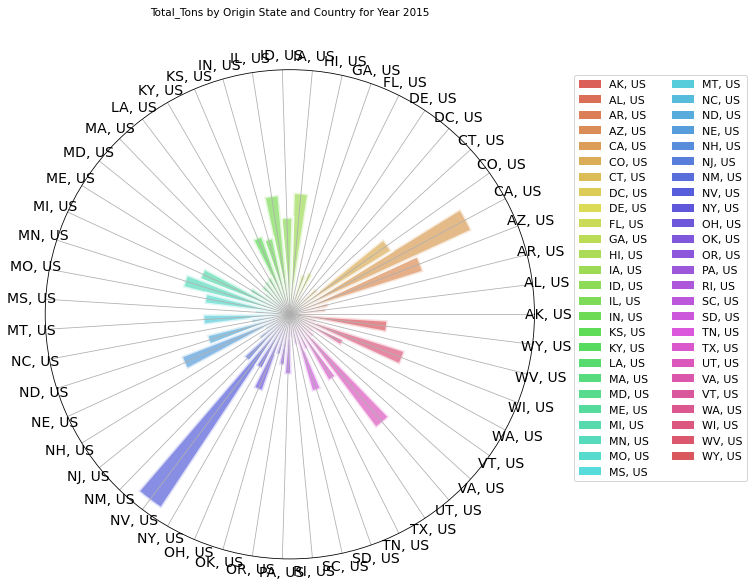

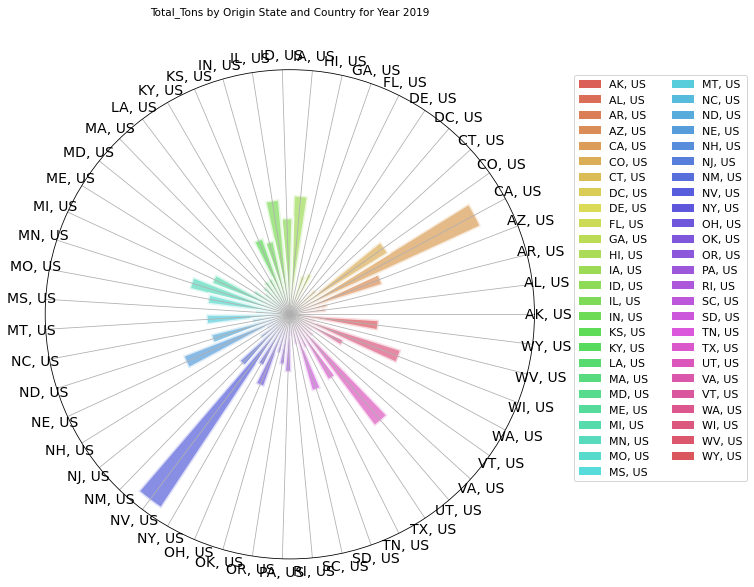

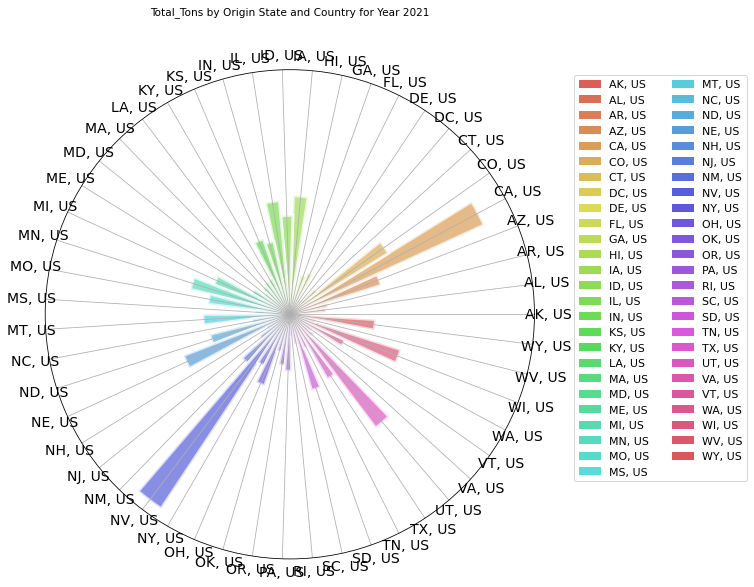

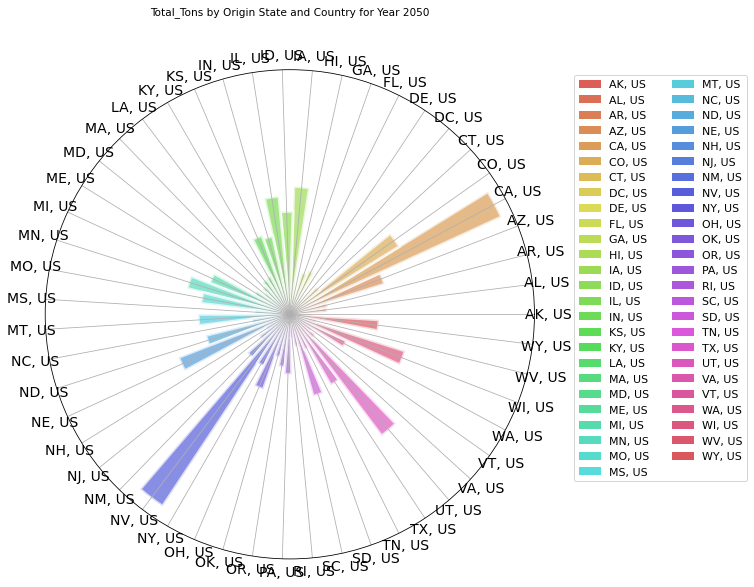

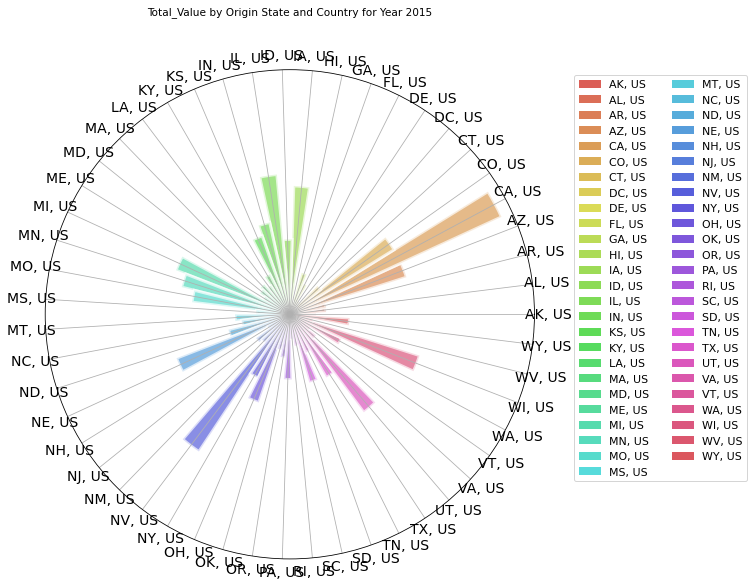

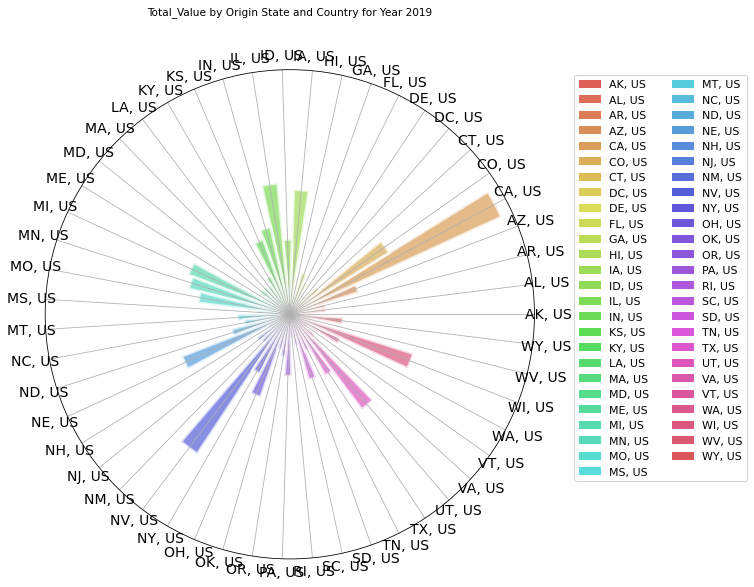

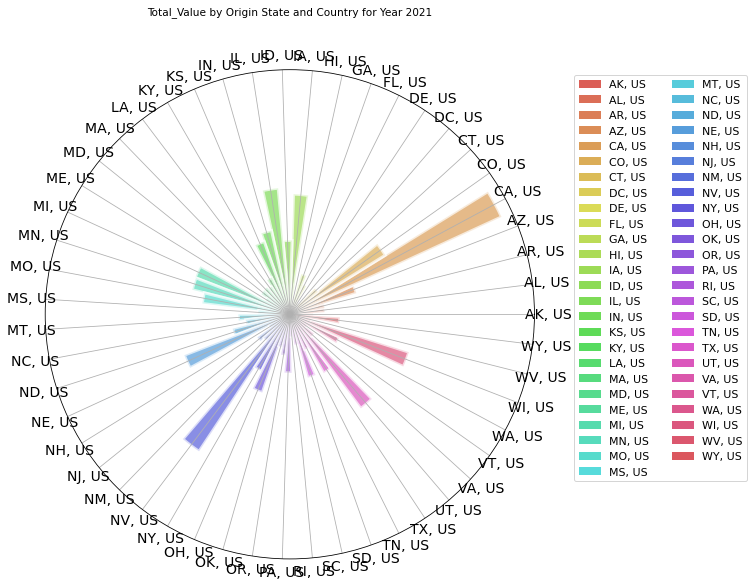

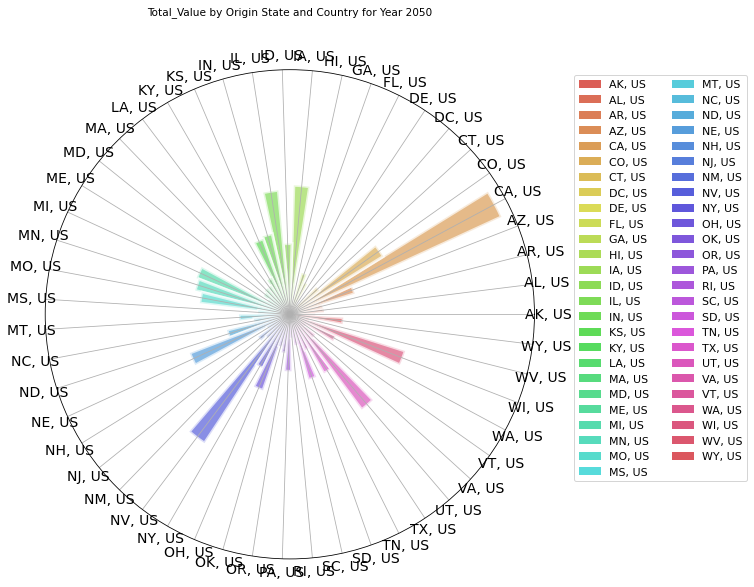

In [38]:
# Run the function for each year for total tons
for year in summary_by_year_state_country['Year'].unique():
    create_circular_bar_chart(us_origin_data, year, 'Total_Tons')

# Run the function for each year for total value
for year in summary_by_year_state_country['Year'].unique():
    create_circular_bar_chart(us_origin_data, year, 'Total_Value')


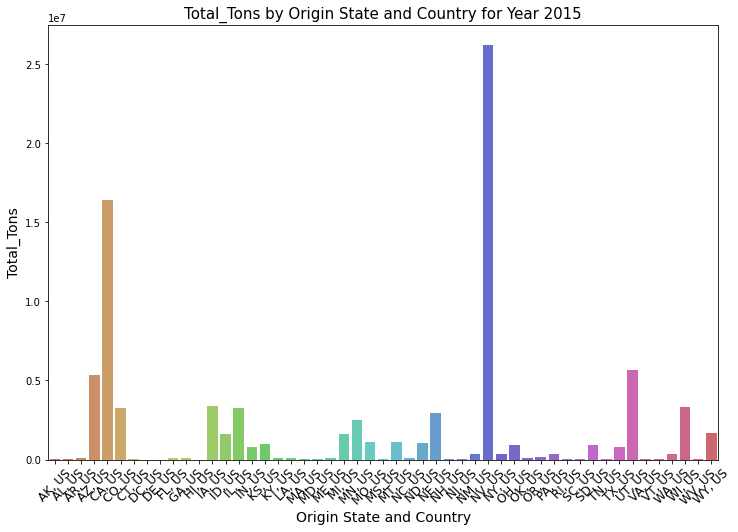

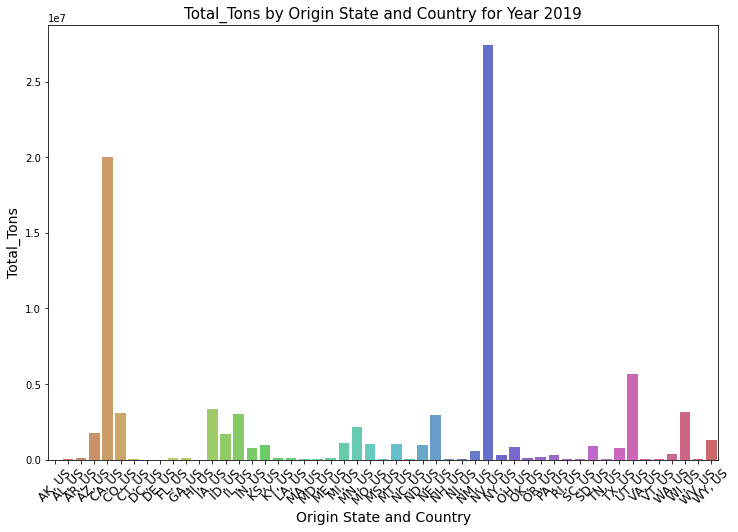

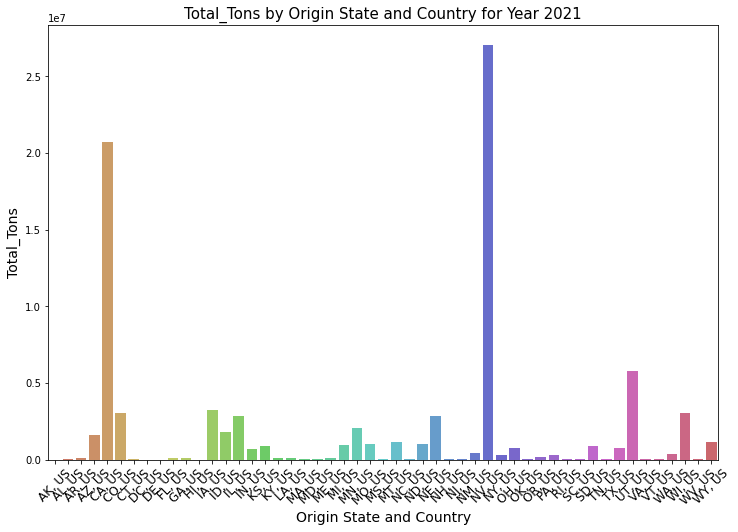

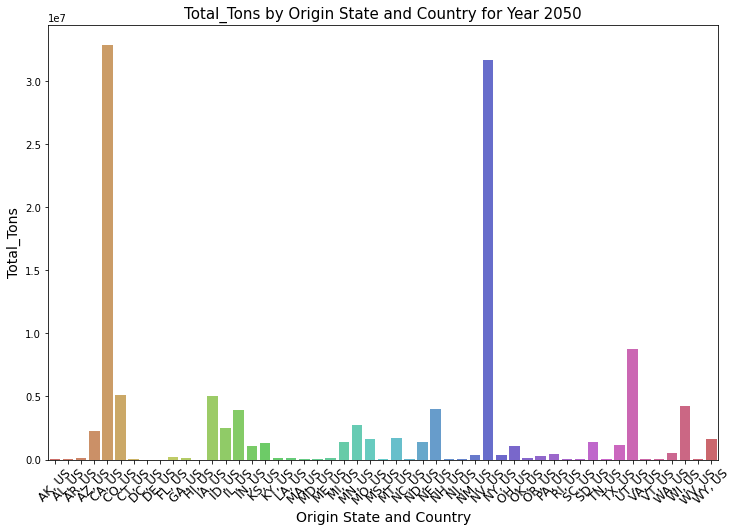

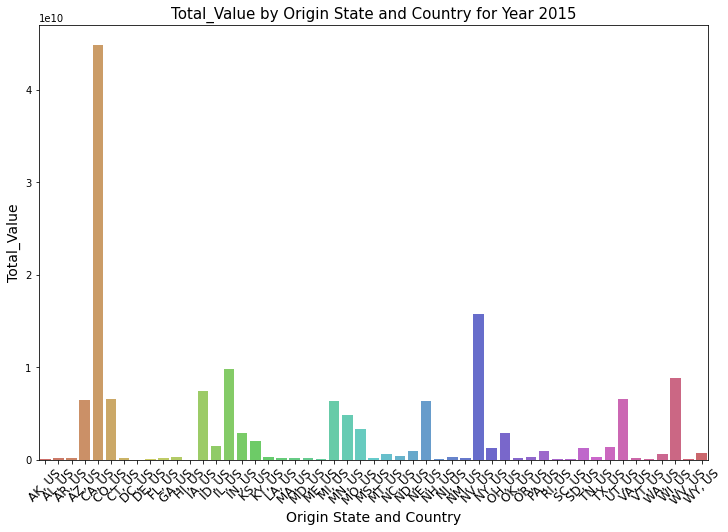

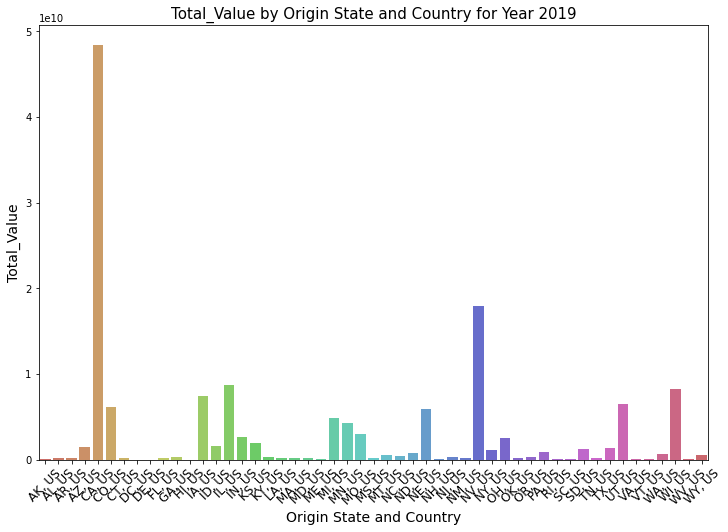

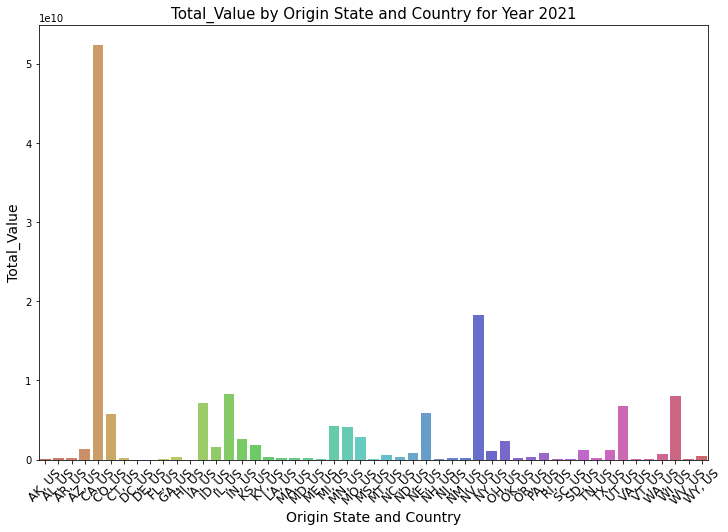

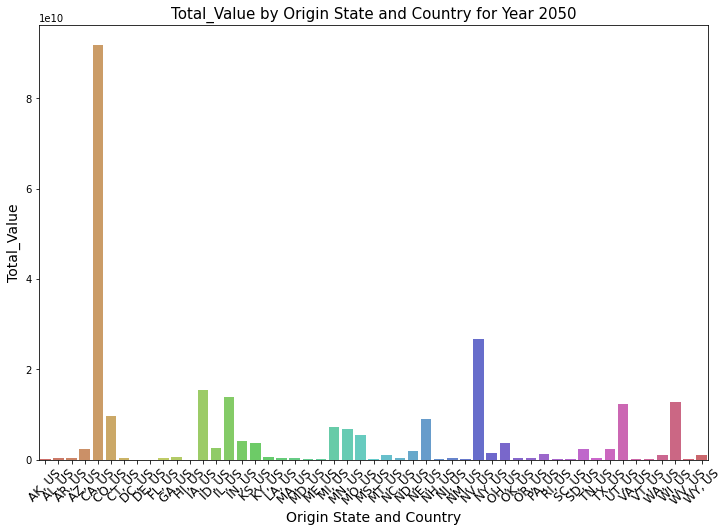

In [39]:
def create_bar_chart(df, year, variable):
    # Filter the DataFrame by the specified year and U.S. as the Origin Country
    df_year = df[(df['Year'] == year) & (df['Origin Country'] == 'US') & (df[variable] > 0)]

    if df_year.empty:
        print(f"No positive values for '{variable}' in year {year}. Skipping plot.")
        return

    # Group by 'Origin State_Country' and sum the variable
    df_year_grouped = df_year.groupby('Origin State_Country')[variable].sum().reset_index()

    # Define the categories and colors
    categories = df_year_grouped['Origin State_Country']
    colors = sns.color_palette("hls", len(categories))

    # Create the bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(x=categories, y=variable, data=df_year_grouped, palette=colors)

    # Customize the axes and labels
    plt.xticks(rotation=45, fontsize=12)
    plt.xlabel('Origin State and Country', fontsize=14)
    plt.ylabel(variable, fontsize=14)
    plt.title(f'{variable} by Origin State and Country for Year {year}', fontsize=15, color='black')

    plt.show()

# Run the function for each year for total tons
for year in summary_by_year_state_country['Year'].unique():
    create_bar_chart(us_origin_data, year, 'Total_Tons')

# Run the function for each year for total value
for year in summary_by_year_state_country['Year'].unique():
    create_bar_chart(us_origin_data, year, 'Total_Value')


In [44]:
# Count the number of unique 'Origin State_Country'
origin_state_country_count = us_origin_data['Origin State_Country'].nunique()
print(f"Number of unique Origin State_Country: {origin_state_country_count}")

# Uncomment the following lines if you have a 'Destination State_Country' column
# destination_state_country_count = us_origin_data['Destination State_Country'].nunique()
# print(f"Number of unique Destination State_Country: {destination_state_country_count}")


Number of unique Origin State_Country: 51


In [45]:
unique_origin_states = us_origin_data['Origin State_Country'].unique()
print(unique_origin_states)


['AK, US' 'AL, US' 'AR, US' 'AZ, US' 'CA, US' 'CO, US' 'CT, US' 'DC, US'
 'DE, US' 'FL, US' 'GA, US' 'HI, US' 'IA, US' 'ID, US' 'IL, US' 'IN, US'
 'KS, US' 'KY, US' 'LA, US' 'MA, US' 'MD, US' 'ME, US' 'MI, US' 'MN, US'
 'MO, US' 'MS, US' 'MT, US' 'NC, US' 'ND, US' 'NE, US' 'NH, US' 'NJ, US'
 'NM, US' 'NV, US' 'NY, US' 'OH, US' 'OK, US' 'OR, US' 'PA, US' 'RI, US'
 'SC, US' 'SD, US' 'TN, US' 'TX, US' 'UT, US' 'VA, US' 'VT, US' 'WA, US'
 'WI, US' 'WV, US' 'WY, US']


In [46]:
# Group the DataFrame by 'Year' and the newly created 'Region' column
grouped_data = us_origin_data.groupby(['Year', 'Region'], as_index=False).agg({'Total_Tons': 'sum'})


KeyError: 'Region'